# Global Warming: Human Inflence Outweighs Natural Causes

This script analyzes multi-country datasets to explore the relative impact of human activity versus natural factors on global warming. The study focuses on the relationship between greenhouse gas emissions (CO₂, CH₄, N₂O) and land surface temperature trends across six countries: China, India, United Kingdom, Tonga, Dominica, and Micronesia. It also incorporates volcanic aerosol (SAOD) data to examine the role of natural cooling mechanisms.

The objective is to uncover statistically grounded correlations between emissions and temperature change, assess whether natural phenomena like volcanic activity can account for recent warming trends, and highlight the global extent of warming—even in low-emission nations.

## Data Sources

Emissions Data (CO₂, Methane & Nitrous Oxide):

https://ourworldindata.org/greenhouse-gas-emissions

Temperature Data:

https://www.fao.org/faostat/en/#data/ET

Annual Wildfire Data:

https://ourworldindata.org/grapher/annual-area-burnt-by-wildfires

Animal Slaughter Data per year:

https://ourworldindata.org/animal-welfare

Annual Disaster Deaths Data:

https://ourworldindata.org/natural-disasters

Global Volcanic Eruptions Data:

https://fmi.b2share.csc.fi/records/dfe14351fd8548bcaca3c2956b17f665


## Loading the libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr

## Loading Datasets

### Emissions Dataset

In [81]:
# Importing Data
ghg_df = pd.read_csv("D:/UCD/Project/data/ghg-emissions-by-gas.csv")

In [82]:
# View Data
print(ghg_df)

             Country Code  Year  \
0              China  CHN  1850   
1              China  CHN  1851   
2              China  CHN  1852   
3              China  CHN  1853   
4              China  CHN  1854   
...              ...  ...   ...   
1039  United Kingdom  GBR  2019   
1040  United Kingdom  GBR  2020   
1041  United Kingdom  GBR  2021   
1042  United Kingdom  GBR  2022   
1043  United Kingdom  GBR  2023   

      Annual nitrous oxide emissions in CO₂ equivalents  \
0                                             5828060.5   
1                                             5919000.5   
2                                             6008322.5   
3                                             6095027.0   
4                                             6178113.5   
...                                                 ...   
1039                                         30362450.0   
1040                                         28980156.0   
1041                                         296

### Animal Slaughtering Dataset

In [83]:
# Importing Data
slaughter_df = pd.read_csv("D:/UCD/Project/data/land-animals-slaughtered-for-meat.csv")

In [84]:
# View Data
print(slaughter_df)

            Country  Year  Land animals slaughtered for meat
0             China  1961                          612113024
1             China  1962                          644345024
2             China  1963                          700668032
3             China  1964                          747843008
4             China  1965                          791415488
..              ...   ...                                ...
343  United Kingdom  2019                         1166693760
344  United Kingdom  2020                         1210861696
345  United Kingdom  2021                         1222381568
346  United Kingdom  2022                         1190216576
347  United Kingdom  2023                         1196560384

[348 rows x 3 columns]


### Temperature Dataset

In [85]:
# Importing Data
temp_df = pd.read_csv("D:/UCD/Project/data/FAOSTAT_data_en_8-6-2025.csv")

# Rename column for easier plotting
temp_df = temp_df.rename(columns={"Temperature Change on Land (°c)": "Temperature_Change"})

In [86]:
# View Data
print(temp_df)

                                                Country       Months  Year  \
0                                                 China  Dec–Jan–Feb  1961   
1                                                 China  Dec–Jan–Feb  1962   
2                                                 China  Dec–Jan–Feb  1963   
3                                                 China  Dec–Jan–Feb  1964   
4                                                 China  Dec–Jan–Feb  1965   
...                                                 ...          ...   ...   
1411  United Kingdom of Great Britain and Northern I...  Sep–Oct–Nov  2020   
1412  United Kingdom of Great Britain and Northern I...  Sep–Oct–Nov  2021   
1413  United Kingdom of Great Britain and Northern I...  Sep–Oct–Nov  2022   
1414  United Kingdom of Great Britain and Northern I...  Sep–Oct–Nov  2023   
1415  United Kingdom of Great Britain and Northern I...  Sep–Oct–Nov  2024   

      Temperature_Change  
0                 -0.068  
1        

### Volcanic Eruptions Dataset

In [87]:
# Loading the dataset
file_path = "D:/UCD/Project/fake_data/Volcanic SAOD (CREST)/ESA-CREST-v2.0-fv005_1984_2023.nc"
ds = xr.open_dataset(file_path)

In [88]:
# View data
print(ds)

<xarray.Dataset>
Dimensions:                                (time: 471, latitude_centers: 18,
                                            altitude: 32)
Coordinates:
  * time                                   (time) datetime64[ns] 1984-10-15 ....
  * latitude_centers                       (latitude_centers) float32 -85.0 ....
  * altitude                               (altitude) float32 39.5 38.5 ... 8.5
Data variables:
    Year                                   (time) float32 ...
    Month                                  (time) float32 ...
    merged_aerosol_extinction              (time, latitude_centers, altitude) float64 ...
    merged_aerosol_extinction_uncertainty  (time, latitude_centers, altitude) float64 ...
    Pinatubo_fitting_flag                  (time, latitude_centers, altitude) float32 ...
    SAOD                                   (time, latitude_centers) float64 ...
    SAOD_uncertainty                       (time, latitude_centers) float64 ...
    SAOD_interpolated  

### Disaster Deaths Dataset

In [89]:
# Importing Data
disaster_df = pd.read_csv("D:/UCD/Project/data/number-of-deaths-from-disasters.csv")

In [90]:
# View Data
print(disaster_df)

            Country  Year  Number of deaths from disasters
0             China  1902                             2500
1             China  1905                                0
2             China  1906                              280
3             China  1907                            12000
4             China  1909                               21
..              ...   ...                              ...
254  United Kingdom  2015                                3
255  United Kingdom  2017                                0
256  United Kingdom  2018                                0
257  United Kingdom  2019                              167
258  United Kingdom  2020                             2558

[259 rows x 3 columns]


### Wildfire Dataset

In [91]:
# Importing Data
fire_df = pd.read_csv("D:/UCD/Project/data/annual-area-burnt-by-wildfires.csv")

In [92]:
# View Data
print(fire_df)

           Country  Year  Annual area burnt by wildfires (in hectares)
0            China  2012                                       2554228
1            China  2013                                       3548627
2            China  2014                                       5535360
3            China  2015                                       4716652
4            China  2016                                       2687853
..             ...   ...                                           ...
79  United Kingdom  2021                                          5169
80  United Kingdom  2022                                         23215
81  United Kingdom  2023                                         10100
82  United Kingdom  2024                                          3449
83  United Kingdom  2025                                         41291

[84 rows x 3 columns]


## Analysis & Plots

### Annual CO₂ Emissions Over Time by Country

In [93]:
# Melting the data
ghg_melted1 = ghg_df.melt(id_vars=["Country", "Year"],
                         value_vars=["Annual CO₂ emissions"],
                         var_name="Gas",
                         value_name="Emissions")

# Melted data
print(ghg_melted1)

             Country  Year                   Gas    Emissions
0              China  1850  Annual CO₂ emissions  173548110.0
1              China  1851  Annual CO₂ emissions  172725490.0
2              China  1852  Annual CO₂ emissions  161629800.0
3              China  1853  Annual CO₂ emissions  176107840.0
4              China  1854  Annual CO₂ emissions  155673870.0
...              ...   ...                   ...          ...
1039  United Kingdom  2019  Annual CO₂ emissions  375835550.0
1040  United Kingdom  2020  Annual CO₂ emissions  335932900.0
1041  United Kingdom  2021  Annual CO₂ emissions  354508670.0
1042  United Kingdom  2022  Annual CO₂ emissions  323781860.0
1043  United Kingdom  2023  Annual CO₂ emissions  315153800.0

[1044 rows x 4 columns]


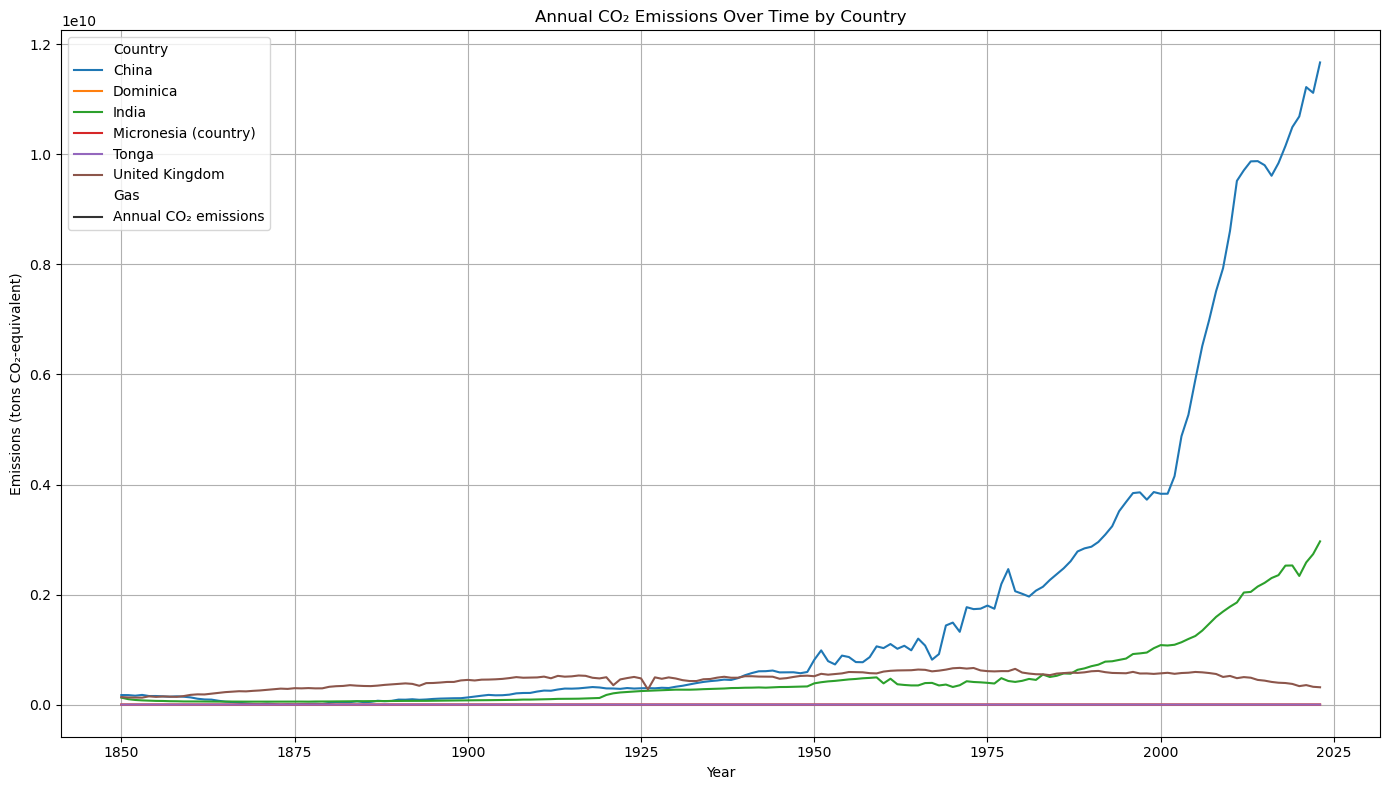

In [94]:
# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=ghg_melted1, x="Year", y="Emissions", hue="Country", style="Gas")
plt.title("Annual CO₂ Emissions Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Emissions (tons CO₂-equivalent)")
plt.grid(True)
plt.tight_layout()
plt.savefig("co2_emissions_plot.png", dpi=300, bbox_inches='tight')
plt.show()

### Annual Methane Emissions Over Time by Country


In [95]:
# Melting the data
ghg_melted2 = ghg_df.melt(id_vars=["Country", "Year"],
                         value_vars=["Annual methane emissions in CO₂ equivalents"],
                         var_name="Gas",
                         value_name="Emissions")

# Melted data
print(ghg_melted2)

             Country  Year                                          Gas  \
0              China  1850  Annual methane emissions in CO₂ equivalents   
1              China  1851  Annual methane emissions in CO₂ equivalents   
2              China  1852  Annual methane emissions in CO₂ equivalents   
3              China  1853  Annual methane emissions in CO₂ equivalents   
4              China  1854  Annual methane emissions in CO₂ equivalents   
...              ...   ...                                          ...   
1039  United Kingdom  2019  Annual methane emissions in CO₂ equivalents   
1040  United Kingdom  2020  Annual methane emissions in CO₂ equivalents   
1041  United Kingdom  2021  Annual methane emissions in CO₂ equivalents   
1042  United Kingdom  2022  Annual methane emissions in CO₂ equivalents   
1043  United Kingdom  2023  Annual methane emissions in CO₂ equivalents   

        Emissions  
0     253096220.0  
1     250934430.0  
2     248776400.0  
3     246622030.0  

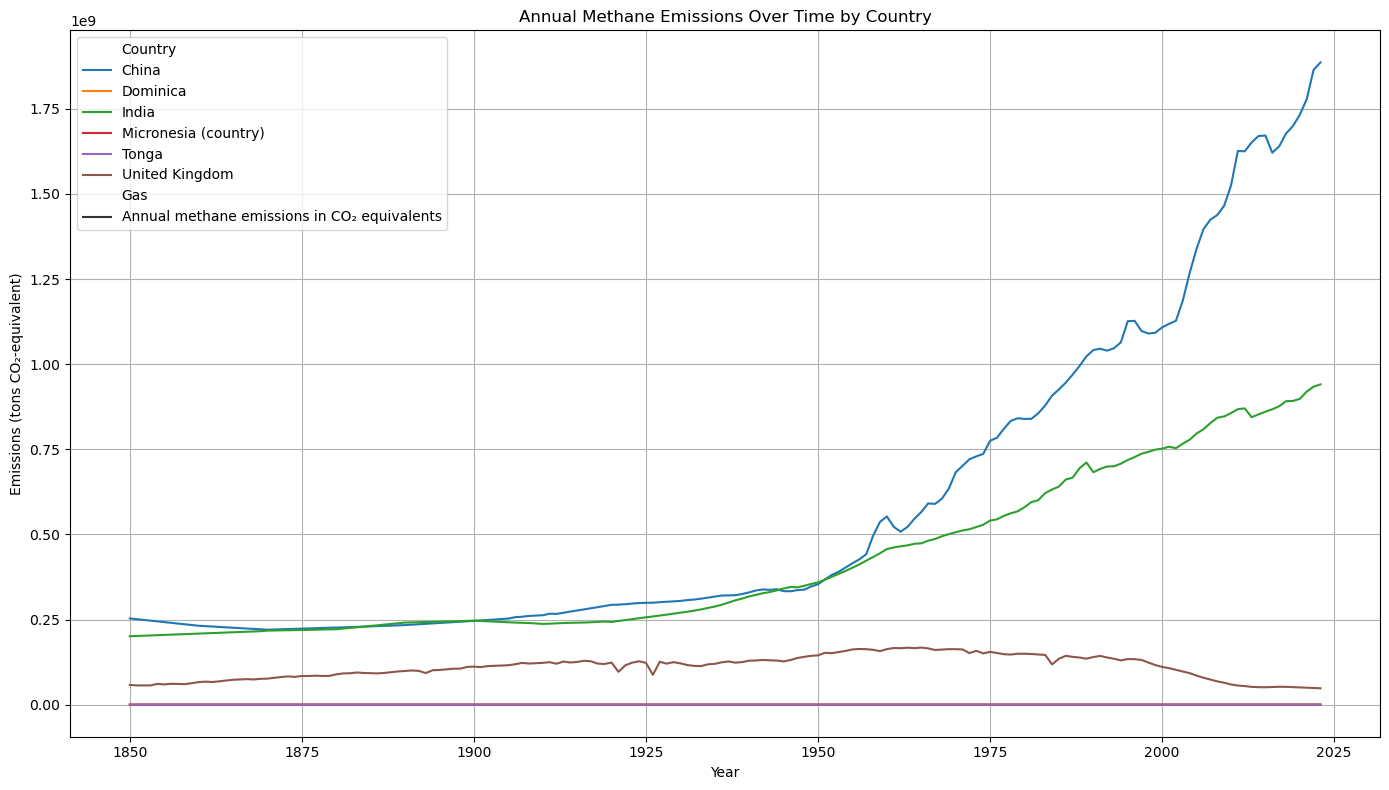

In [96]:
# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=ghg_melted2, x="Year", y="Emissions", hue="Country", style="Gas")
plt.title("Annual Methane Emissions Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Emissions (tons CO₂-equivalent)")
plt.grid(True)
plt.tight_layout()
plt.savefig("methane_emissions_plot.png", dpi=300, bbox_inches='tight')
plt.show()

### Annual Nitrous Oxide Emissions Over Time by Country

In [97]:
# Melting the data
ghg_melted3 = ghg_df.melt(id_vars=["Country", "Year"],
                         value_vars=["Annual nitrous oxide emissions in CO₂ equivalents"],
                         var_name="Gas",
                         value_name="Emissions")

# Melted data
print(ghg_melted3)

             Country  Year                                                Gas  \
0              China  1850  Annual nitrous oxide emissions in CO₂ equivalents   
1              China  1851  Annual nitrous oxide emissions in CO₂ equivalents   
2              China  1852  Annual nitrous oxide emissions in CO₂ equivalents   
3              China  1853  Annual nitrous oxide emissions in CO₂ equivalents   
4              China  1854  Annual nitrous oxide emissions in CO₂ equivalents   
...              ...   ...                                                ...   
1039  United Kingdom  2019  Annual nitrous oxide emissions in CO₂ equivalents   
1040  United Kingdom  2020  Annual nitrous oxide emissions in CO₂ equivalents   
1041  United Kingdom  2021  Annual nitrous oxide emissions in CO₂ equivalents   
1042  United Kingdom  2022  Annual nitrous oxide emissions in CO₂ equivalents   
1043  United Kingdom  2023  Annual nitrous oxide emissions in CO₂ equivalents   

       Emissions  
0      5

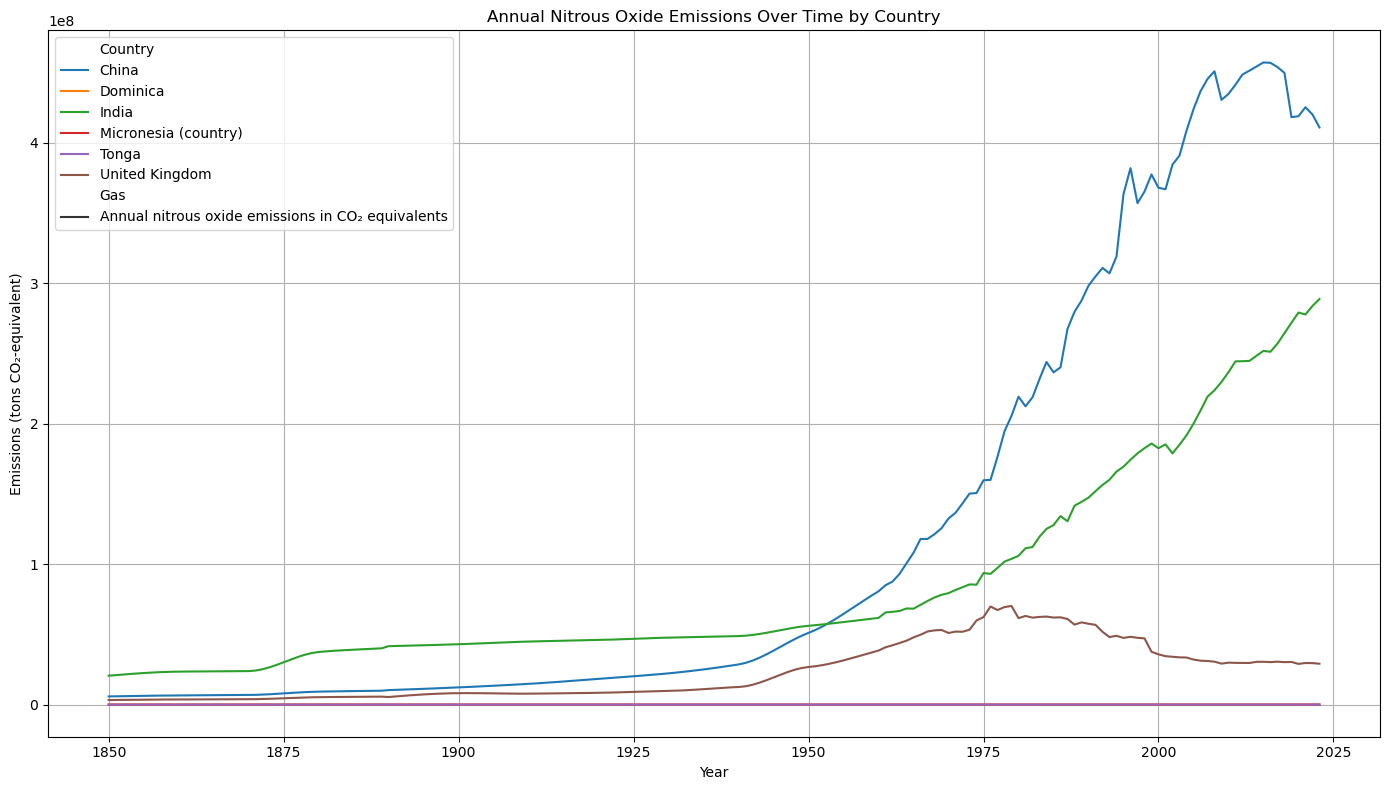

In [98]:
# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=ghg_melted3, x="Year", y="Emissions", hue="Country", style="Gas")
plt.title("Annual Nitrous Oxide Emissions Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Emissions (tons CO₂-equivalent)")
plt.grid(True)
plt.tight_layout()
plt.savefig("no2_emissions_plot.png", dpi=300, bbox_inches='tight')
plt.show()

### Land Animals Slaughtered for Meat Over Time

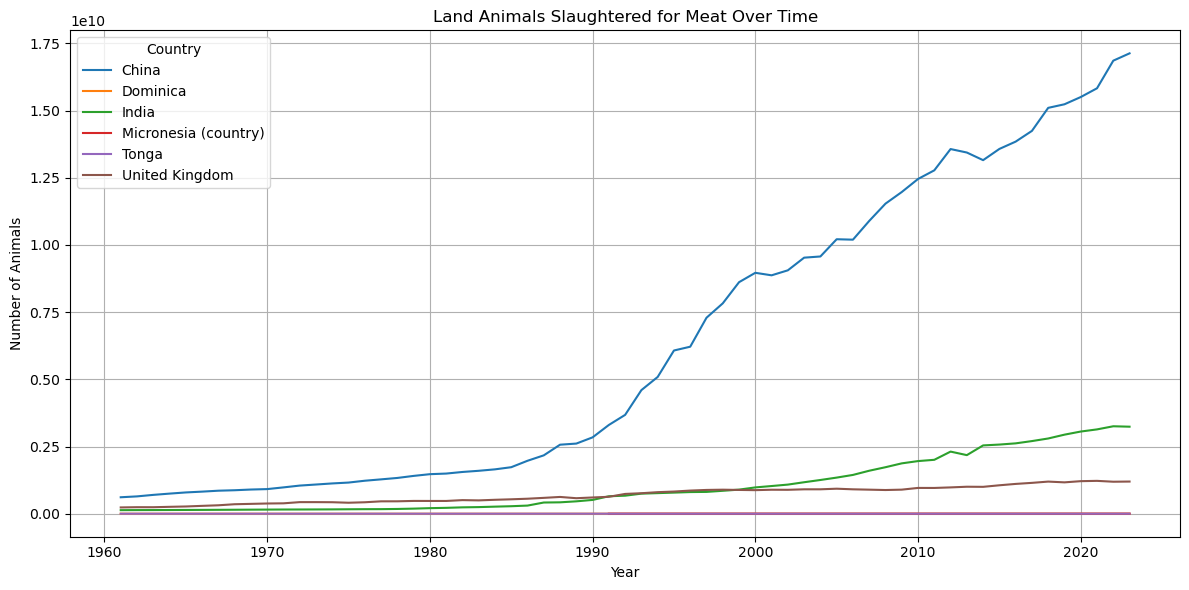

In [99]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=slaughter_df, x="Year", y="Land animals slaughtered for meat", hue="Country")
plt.title("Land Animals Slaughtered for Meat Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Animals")
plt.grid(True)
plt.tight_layout()
plt.savefig("animal_slaughter_plot.png", dpi=300, bbox_inches='tight')
plt.show()

### Annual Temperature Change Over Time

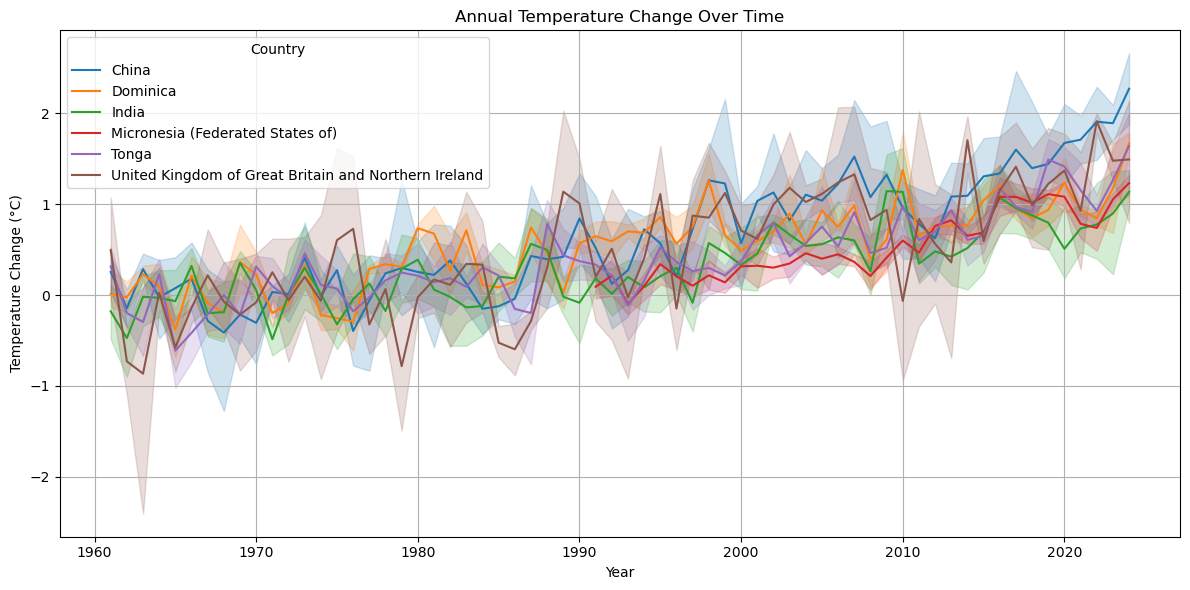

In [100]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_df, x="Year", y="Temperature_Change", hue="Country")
plt.title("Annual Temperature Change Over Time")
plt.ylabel("Temperature Change (°C)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.savefig("temperature_change.png", dpi=300, bbox_inches='tight')
plt.show()

### Correlation Analysis (CO₂ & Temperature)

In [101]:
# CO₂ Data
ghg_CO2 = ghg_df.melt(id_vars=["Country", "Year"],
                         value_vars=["Annual CO₂ emissions"], var_name="Gas",
                         value_name="CO2_emissions")

# Temperature Data
temp_df = pd.read_csv("D:/UCD/Project/data/FAOSTAT_data_en_8-6-2025.csv")

# Rename column for easier plotting
temp_df = temp_df.rename(columns={"Temperature Change on Land (°c)": "Temperature_Change"})

# Merging both CO₂ and Temperature data
new_df = pd.merge(ghg_CO2, temp_df, on=["Country", "Year"])

In [102]:
# Correlation Analysis (CO₂ & Temperature)
new_df[["CO2_emissions", 'Temperature_Change']].corr()

,CO2_emissions,Temperature_Change
CO2_emissions,1.000000,0.425187
Temperature_Change,0.425187,1.000000


In [103]:
# Correlation Analysis (CO₂ & Temperature) - Countrywise
new_df.groupby('Country')[["CO2_emissions", 'Temperature_Change']].corr()

CO2_emissions  Temperature_Change
Country                                                       
China    CO2_emissions            1.000000            0.690465
         Temperature_Change       0.690465            1.000000
Dominica CO2_emissions            1.000000            0.302584
         Temperature_Change       0.302584            1.000000
India    CO2_emissions            1.000000            0.574797
         Temperature_Change       0.574797            1.000000
Tonga    CO2_emissions            1.000000            0.172908
         Temperature_Change       0.172908            1.000000

### Global Average SAOD Over Time (Volcanic Eruptions)

In [104]:
# Assuming 'saod' is the variable name and it has lat dims
saod = ds['SAOD']

# Weight by cosine of latitude (because Earth’s surface area varies by lat)
weights = np.cos(np.deg2rad(ds['latitude_centers']))
weights.name = "weights"

# Global weighted average over lat
global_avg_saod = saod.weighted(weights).mean(dim=["latitude_centers"])

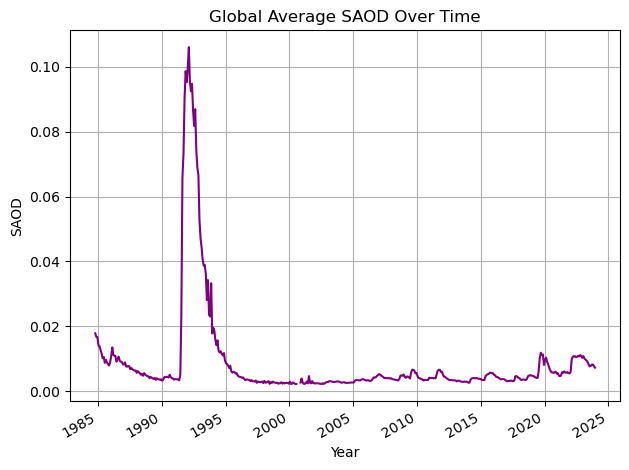

In [105]:
# Plot
global_avg_saod.plot(label='Global Avg SAOD', color='purple')
plt.title("Global Average SAOD Over Time")
plt.xlabel("Year")
plt.ylabel("SAOD")
plt.grid(True)
plt.tight_layout()
plt.savefig("global_saod.png", dpi=300, bbox_inches='tight')
plt.show()

### Disaster Deaths Over Time

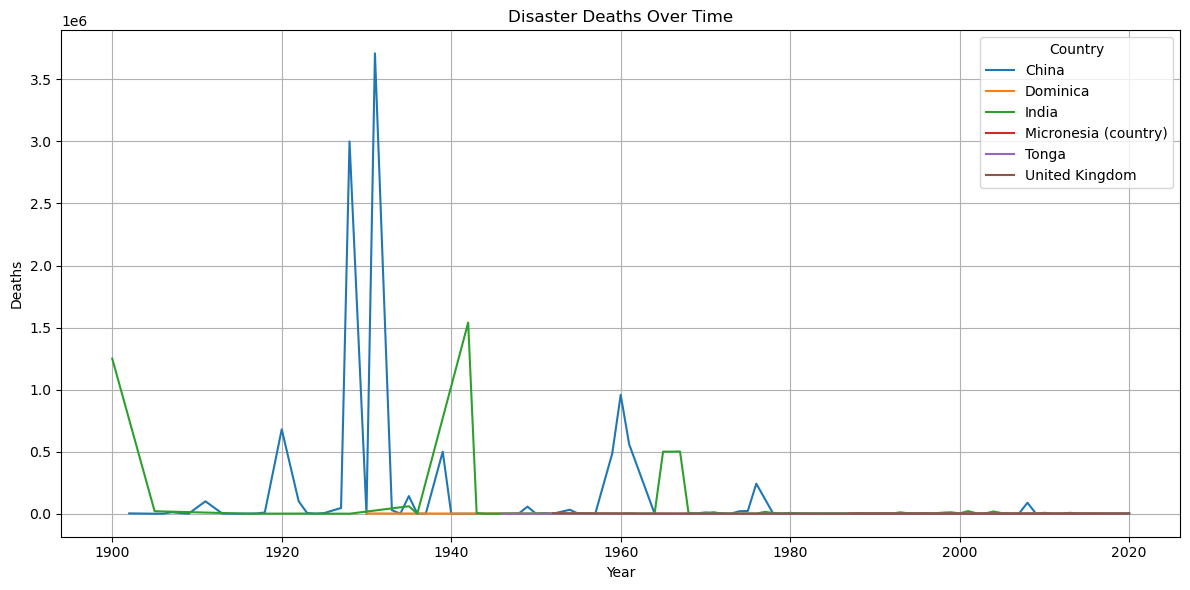

In [106]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=disaster_df, x="Year", y="Number of deaths from disasters", hue="Country")
plt.title("Disaster Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.savefig("disaster_deaths_plot.png", dpi=300, bbox_inches='tight')
plt.show()

### Annual Area Burnt by Wildfires

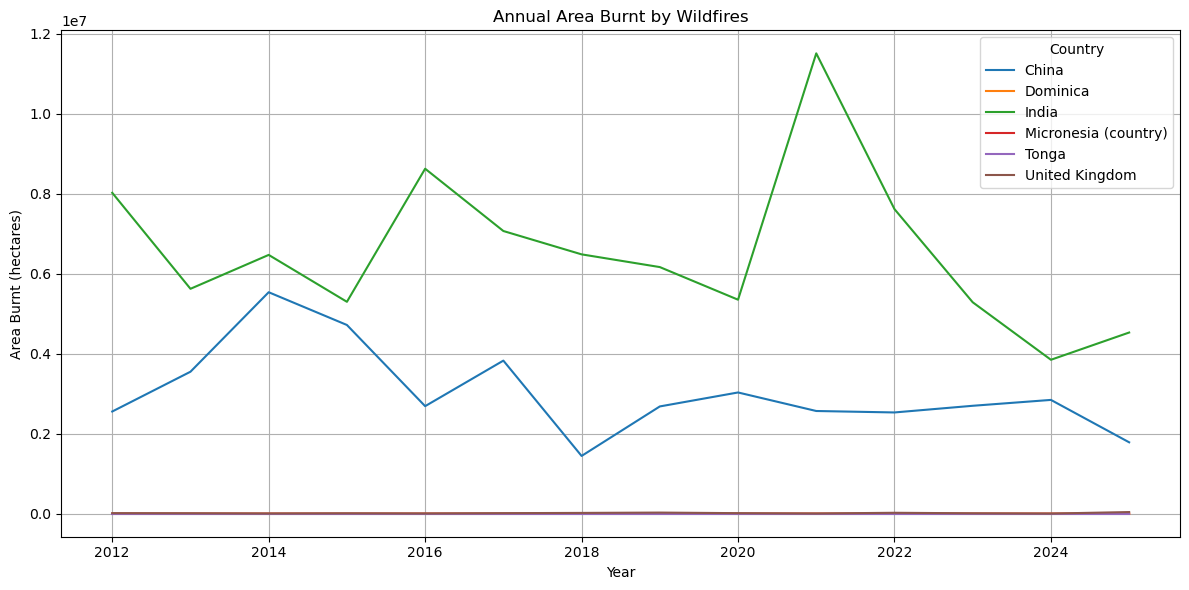

In [107]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=fire_df, x="Year", y="Annual area burnt by wildfires (in hectares)", hue="Country")
plt.title("Annual Area Burnt by Wildfires")
plt.xlabel("Year")
plt.ylabel("Area Burnt (hectares)")
plt.grid(True)
plt.tight_layout()
plt.savefig("wildfire_plot.png", dpi=300, bbox_inches='tight')
plt.show()